# 01 — Binary Classification (PyCaret, GPU)
**Dataset:** Pima Indians Diabetes (binary `Outcome`)  
**Goal:** Predict diabetes outcome.  
**GPU:** Enabled via `use_gpu=True`. XGBoost/CatBoost leverage GPU when available.

**Steps**
1. Install packages & verify GPU
2. Download data
3. Quick EDA
4. `setup` with `use_gpu=True`
5. `compare_models` (favor GPU) + `tune_model`
6. Evaluate & finalize
7. Save model to `/content/artifacts`

In [1]:
# Install latest stable PyCaret 3.x and common GPU-capable libs
!pip -q install --upgrade pycaret xgboost catboost lightgbm plotly gradio

import sys, sklearn, pycaret, platform
print("Python:", sys.version)
print("Platform:", platform.platform())
print("scikit-learn:", sklearn.__version__)
print("pycaret:", pycaret.__version__)

# Check GPU
try:
    import subprocess, shutil
    if shutil.which("nvidia-smi"):
        print("\nGPU detected:")
        print(subprocess.check_output(["nvidia-smi"], text=True))
    else:
        print("\nNo NVIDIA GPU detected in this runtime. (Colab: Runtime -> Change runtime type -> GPU)")
except Exception as e:
    print("GPU check error:", e)

zsh:1: command not found: pip
Python: 3.11.11 (main, Feb  5 2025, 19:11:07) [Clang 19.1.6 ]
Platform: Linux-6.6.87.2-microsoft-standard-WSL2-x86_64-with-glibc2.35
scikit-learn: 1.4.2
pycaret: 3.3.2

GPU detected:
Sun Nov  2 15:28:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.65.05              Driver Version: 580.88         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti     On  |   00000000:01:00.0  On |                  N/A |
|  0%   40C    P8  

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [3]:
print("Shape:", df.shape)
display(df.head())
display(df.describe(include='all').T.head(20))
print("\nNA counts:")
print(df.isna().sum())

Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00



NA counts:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
import pathlib
ART_DIR = "/content/artifacts"
pathlib.Path(ART_DIR).mkdir(parents=True, exist_ok=True)
print("Artifacts dir:", ART_DIR)

PermissionError: [Errno 13] Permission denied: '/content'

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Description,Value
0,Session id,42
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7821,0.8269,0.5878,0.7341,0.6512,0.4959,0.5035,0.0167
ridge,Ridge Classifier,0.7784,0.8260,0.5878,0.7248,0.6473,0.4887,0.4956,0.0133
lda,Linear Discriminant Analysis,0.7747,0.8259,0.5878,0.7156,0.6435,0.4815,0.4877,0.0167
nb,Naive Bayes,0.7523,0.8085,0.5771,0.6762,0.6184,0.4372,0.4435,0.0133
rf,Random Forest Classifier,0.7486,0.7949,0.5716,0.6615,0.6103,0.4268,0.4314,0.1933
qda,Quadratic Discriminant Analysis,0.7486,0.8013,0.5507,0.6825,0.6058,0.4242,0.4323,0.0167
et,Extra Trees Classifier,0.7430,0.7982,0.5344,0.6712,0.5898,0.4069,0.4158,0.1633
gbc,Gradient Boosting Classifier,0.7225,0.7795,0.5715,0.6090,0.5865,0.3787,0.3814,0.0900
lightgbm,Light Gradient Boosting Machine,0.7225,0.7651,0.5610,0.6123,0.5838,0.3765,0.3786,0.0733
knn,K Neighbors Classifier,0.7169,0.7478,0.4867,0.6222,0.5451,0.3441,0.3503,0.0600


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7877,0.8588,0.6667,0.7119,0.6885,0.5278,0.5284
1,0.7654,0.7972,0.5484,0.7083,0.6182,0.4528,0.4605
2,0.7765,0.8253,0.5484,0.7391,0.6296,0.4746,0.4855
Mean,0.7765,0.8271,0.5878,0.7198,0.6454,0.4850,0.4915
Std,0.0091,0.0252,0.0558,0.0138,0.0308,0.0315,0.0281


Fitting 3 folds for each of 10 candidates, totalling 30 fits


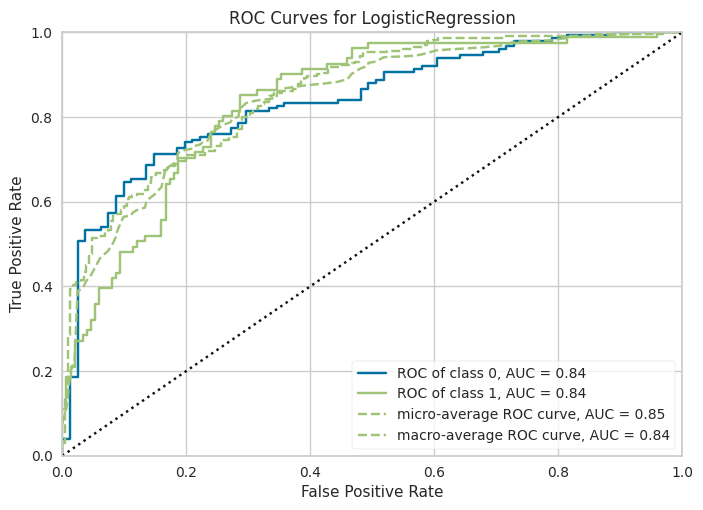

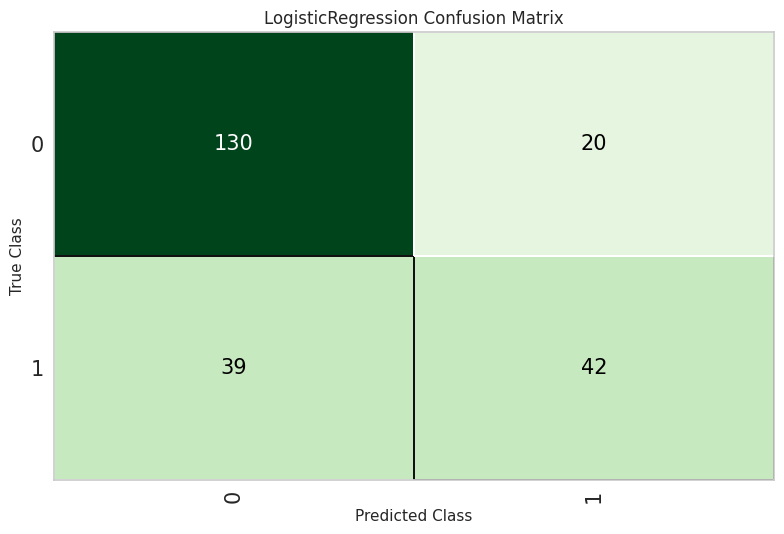

In [9]:
from pycaret.classification import *
s = setup(
    data=df,
    target='Outcome',
    session_id=42,
    normalize=True,
    fold=3,
    use_gpu=True,
    n_jobs=-1
)
best = compare_models()
tuned = tune_model(best, optimize='AUC')
plot_model(tuned, plot='auc')
plot_model(tuned, plot='confusion_matrix')
final = finalize_model(tuned)
# save_path = save_model(final, f"{ART_DIR}/binary_diabetes_model")
# print("Saved:", save_path)

In [11]:
# GPU sanity checks on models that support it
try:
    xgb = create_model('lightgbm')
    print("LightGBM tree_method:", xgb.get_xgb_params().get('tree_method'))
except Exception as e:
    print("LightGBM GPU check skipped:", e)
try:
    cat = create_model('knn')
    print("KNN algorithm:", cat.get_params().get('algorithm'))
except Exception as e:
    print("KNN GPU check skipped:", e)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7374,0.7905,0.6508,0.6212,0.6357,0.4306,0.4309
1,0.6760,0.7175,0.4839,0.5357,0.5085,0.2677,0.2685
2,0.7542,0.7872,0.5484,0.6800,0.6071,0.4313,0.4365
Mean,0.7225,0.7651,0.5610,0.6123,0.5838,0.3765,0.3786
Std,0.0336,0.0336,0.0687,0.0592,0.0545,0.0769,0.0779


LightGBM GPU check skipped: 'LGBMClassifier' object has no attribute 'get_xgb_params'


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6816,0.7281,0.4762,0.5556,0.5128,0.2784,0.2802
1,0.7430,0.7200,0.5323,0.6600,0.5893,0.4054,0.4104
2,0.7263,0.7954,0.4516,0.6512,0.5333,0.3485,0.3602
Mean,0.7169,0.7478,0.4867,0.6222,0.5451,0.3441,0.3503
Std,0.0259,0.0338,0.0337,0.0473,0.0323,0.0520,0.0536


KNN algorithm: auto
